In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os


In [65]:
path = 'Batik/' # import dataset folder

def load_dataset(path):
    data = []
    labels = []
    names = []
    for sub_folder in os.listdir(path): 
        files = os.listdir(os.path.join(path, sub_folder))
        for i, name in enumerate(files):
            image = cv2.imread(os.path.join(path, sub_folder, name), 0)
            data.append(image)
            labels.append(sub_folder)
            names.append(name)
    return data, labels, names
image, labels, names = load_dataset(path)


Text(0.5, 1.0, 'Megamendung')

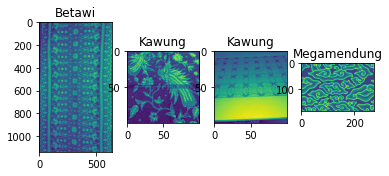

In [67]:

plt.subplot(1,4,1)
plt.imshow(image[1])
plt.title(labels[1])
plt.subplot(1,4,2)
plt.imshow(image[10])
plt.title(labels[20])
plt.subplot(1,4,3)
plt.imshow(image[30])
plt.title(labels[30])
plt.subplot(1,4,4)
plt.imshow(image[40])
plt.title(labels[40])

In [68]:
image = np.array(image)
labels = np.array(labels)
names = np.array(names)

C:\Users\Computer\AppData\Local\Temp\ipykernel_4520\213719442.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image = np.array(image)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


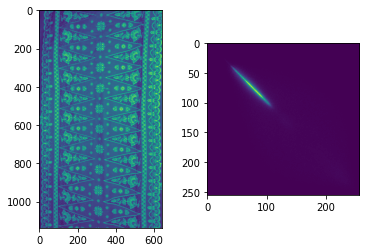

In [24]:
max = np.max(image[1])
imgTmp = np.zeros([max+1,max+1]) 

for i in range (len(image[1])): 
       for j in range(len(image[1][i])-1):
           imgTmp[image[1][i,j],image[1][i,j+1]] +=1
print(imgTmp)
plt.subplot(1,2,1)
plt.imshow(image[1])
plt.subplot(1,2,2)
plt.imshow(imgTmp)


In [59]:
def derajat0 (img): # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp = np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len(img)): # melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range(len(img[i])-1): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i,j],img[i,j+1]] +=1
            
    transpos = np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan 
    data = imgTmp+transpos
    
    tmp = 0
    #normalisasi
    for i in range (len(data)): # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range(len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range(len(data)): # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range(len(data)): # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

In [60]:
def derajat45 (img):  # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp=np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len (img)-1):  # melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range (len (img[i])-1): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i+1,j],img[i,j+1]] += 1
            
    transpos= np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan
    data= imgTmp+transpos
    
    tmp=0
    for i in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

In [61]:
def derajat90 (img): # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp=np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len (img)-1): # melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range (len (img[i])): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i+1,j],img[i,j]] += 1
            
    transpos= np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan
    data= imgTmp+transpos
    
    tmp=0
    for i in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

In [62]:
def derajat135 (img): # membuat fungsi derajat berdasarkan soal jurnal
    max = np.max(img) # menampung data image
    imgTmp=np.zeros([max+1,max+1]) #membuat matriks kosong
    for i in range (len (img)-1):# melakukan perulangan untuk memberikan nilai derat setiap data
        for j in range (len (img[i])-1): # melakukan perulangan untuk memberikan nilai derat setiap data
            imgTmp[img[i,j],img[i+1,j+1]] += 1
            
    transpos= np.transpose(imgTmp) #mentranspos nilai matriks yang telah didapatkan
    data= imgTmp+transpos
    
    tmp=0
    for i in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len(data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            tmp+=data[i,j]
            
    for i in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
        for j in range (len (data)):  # melakukan perulang untuk menormalisasi data yang telah didapatkan dari matriks transpos
            data[i,j]/=tmp
    return data

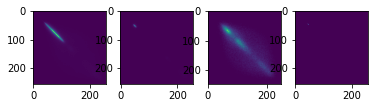

In [69]:
plt.subplot(1,4,1)
plt.imshow(derajat0(image[1]))
plt.subplot(1,4,2)
plt.imshow(derajat45(image[2]))
plt.subplot(1,4,3)
plt.imshow(derajat90(image[3]))
plt.subplot(1,4,4)
plt.imshow(derajat135(image[4]))

In [32]:
def contrast(data): # membuat fungsi fitur contrast
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= data[i,j]+pow(i-j,2)
    return simpan

In [33]:
def dissimilarity(data): # membuat fungsi fitur dissimilarity
    simpan = 0
    for i in range (len(data)): 
        for j in range(len(data)):
            simpan+= data[i,j]+abs(i-j)
    return simpan

In [34]:
def homogenitas(data): # membuat fungsi fitur homogenitas
    simpan = 0 
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=data[i,j]/(1+abs(i-j))
    return simpan

In [35]:
def entropi(data): # membuat fungsi fitur entropi
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                simpan+= -(data[i,j] * math.log(data[i,j]))
    return simpan

In [36]:
def ASM(data): # membuat fungsi fitur ASM
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow(data[i,j],2)
    return simpan 

In [37]:
def energy(data): # membuat fungsi fitur energy
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=pow(data[i,j],2)
    return simpan

In [38]:
def correlation(data,mI,mJ,tI,tJ): # membuat fungsi fitur correlation
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=((i-mI)*(j-mJ)*data[i,j])/(tI*tJ)
    return simpan

In [75]:
def meanI(data): # membuat fungsi mean 
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= i * data[i,j]
    return simpan

def meanJ(data): # membuat fungsi mean
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= j * data[i,j]
    return simpan  
def taoI(data,mI): # membuat fungsi tao
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((i-mI),2)*data[i,j]
    simpan = math.sqrt(simpan)
    return simpan
def taoJ(data,mJ): # membuat fungsi tao
    simpan = 0
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((j-mJ),2)*data[i,j]
    simpan = math.sqrt(simpan)
    return simpan

In [70]:
hasil = []
for i in range(len(image)):
    dat = []
    print(i)
    dat.append(derajat0 (image[i]))
    dat.append(derajat45 (image[i]))
    dat.append(derajat90 (image[i]))
    dat.append(derajat135 (image[i]))
    hasil.append(dat)
   
       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [76]:
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
           ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
           ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
           ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']


In [77]:
def save_frame(result):
    frame = []
    indeks = 0
    for i in hasil:
        save = []
        save.append(names[indeks])
        indeks+=1
        for j in i:
            en = energy(j)
            save.append(en)
            
            hm = homogenitas(j)
            save.append(hm)
            
            ent = entropi(j)
            save.append(ent)
            
            con = contrast(j)
            save.append(con)

            dis = dissimilarity(j)
            save.append(dis)

            asm = ASM(j)
            save.append(asm)
            mI = meanI(j)
            mJ = meanJ(j)
            tI = taoI(j,mI)
            tJ = taoJ(j,mJ)

            cor = correlation(j,mI,mJ,tI,tJ)
            save.append(cor)
        frame.append(save)
    return frame    

In [78]:
frame = save_frame(hasil)
df = pd.DataFrame(frame, columns=headerPass)

In [79]:
df.head()

,path,energi0,homogenitas0,entropy0,contras0,dissimilarity0,ASM0,correlation0,energi45,homogenitas45,...,dissimilarity90,ASM90,correlation90,energi135,homogenitas135,entropy135,contras135,dissimilarity135,ASM135,correlation135
0,4 (1).jpg,0.005582,0.261484,8.516266,6.721158e+08,5.334253e+06,0.005582,0.886492,0.004519,0.231116,...,5.334253e+06,0.005664,0.893938,0.004609,0.234483,8.674875,6.721158e+08,5.334253e+06,0.004609,0.821408
1,4 (10).jpg,0.000360,0.231927,9.123769,7.158170e+08,5.592321e+06,0.000360,0.802586,0.000294,0.204196,...,5.592321e+06,0.000383,0.789946,0.000294,0.204104,9.307833,7.158170e+08,5.592321e+06,0.000294,0.671440
2,4 (2).jpg,0.002968,0.304225,8.297290,7.158170e+08,5.592321e+06,0.002968,0.880472,0.002477,0.276245,...,5.592321e+06,0.003982,0.889562,0.002560,0.280553,8.457642,7.158170e+08,5.592321e+06,0.002560,0.805133
3,4 (3).jpg,0.000094,0.130539,9.636730,6.304468e+08,5.084249e+06,0.000094,0.794805,0.000076,0.109231,...,5.084249e+06,0.000092,0.783074,0.000077,0.112024,9.803600,6.304468e+08,5.084249e+06,0.000077,0.681530
4,4 (5).jpg,0.024457,0.360395,7.857399,7.158170e+08,5.592321e+06,0.024457,0.397003,0.020127,0.337701,...,5.592321e+06,0.023622,0.378709,0.020130,0.337283,7.985660,7.158170e+08,5.592321e+06,0.020130,0.389797


In [81]:
 df.to_csv(r'Batik.csv', index=False)